## Investigating the Limitations of Sturges' Rule in Histogram Binning

In this notebook, I will explore how Sturges' Rule for determining the number of bins in a histogram can fail to capture important features of certain datasets. I will create an artificial dataset that breaks Sturges' Rule and see how it affects the visualization.

### 1. Introduction

Sturges' Rule is a simple method to determine the number of bins (k) to use in a histogram:

$$
k = \lceil \log_2 n + 1 \rceil
$$

- n: Number of data points
- ⌈⋅⌉: ceiling function.

Sturges' Rule works well for datasets that are approximately normally distributed and of moderate size. However, it can underestimate the number of bins for large datasets or those with skewness and outliers.

In this notebook, I will create a skewed dataset with outliers and see how Sturges' Rule performs compared to other binning methods.

### 2. Generating a Skewed Dataset with Outliers

I will generate a dataset that consists of a log-normal distribution (which is positively skewed) and add some extreme outliers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate log-normal data (positively skewed)
data = np.random.lognormal(mean=0, sigma=1, size=1000)

# Add outliers
outliers = np.random.uniform(low=20, high=50, size=10)
data_with_outliers = np.concatenate([data, outliers])

### 3. Applying Sturges' Rule

Calculate the number of bins using Sturges' Rule.

- np.histogram_bin_edges() returns the bin edges.
- The number of bins is one less than the number of edges.

In [8]:
# Use numpy's built-in function for Sturges' Rule
bin_edges_sturges = np.histogram_bin_edges(data_with_outliers, bins='sturges')
k_sturges = len(bin_edges_sturges) - 1
print(f"Number of bins according to Sturges' Rule: {k_sturges}")

Number of bins according to Sturges' Rule: 11


Similarly for other methods:

**Freedman-Diaconis Rule**

In [3]:
# Use numpy's built-in function for Freedman-Diaconis Rule
bin_edges_fd = np.histogram_bin_edges(data_with_outliers, bins='fd')
k_fd = len(bin_edges_fd) - 1
print(f"Number of bins according to Freedman-Diaconis Rule: {k_fd}")

Number of bins according to Freedman-Diaconis Rule: 181


**Square Root Rule**

In [4]:
# Use numpy's built-in function for Square Root Rule
bin_edges_sqrt = np.histogram_bin_edges(data_with_outliers, bins='sqrt')
k_sqrt = len(bin_edges_sqrt) - 1
print(f"Number of bins according to Square Root Rule: {k_sqrt}")

Number of bins according to Square Root Rule: 32


### 4. Plotting Histograms

Now, let's plot the histograms using the binning methods specified.

**Histogram using Sturges' Rule**

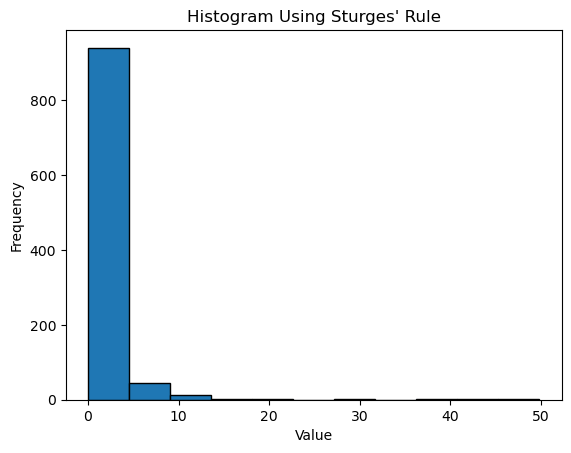

In [5]:
# Plot histogram using Sturges' Rule
plt.hist(data_with_outliers, bins='sturges', edgecolor='black')
plt.title("Histogram Using Sturges' Rule")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

**Histogram using Freedman-Diaconis Rule**

For comparison, let's use the Freedman-Diaconis Rule, which adjusts the bin width based on data variability.

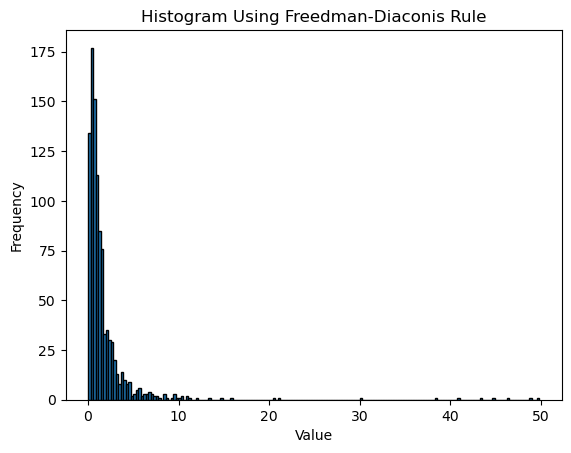

In [6]:
# Calculate bin width using Freedman-Diaconis Rule
plt.hist(data_with_outliers, bins='fd', edgecolor='black')
plt.title("Histogram Using Freedman-Diaconis Rule")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

**Histogram using Square Root Rule**

Let's also try the Square Root Rule for the number of bins:


k=⌈root(n)⌉

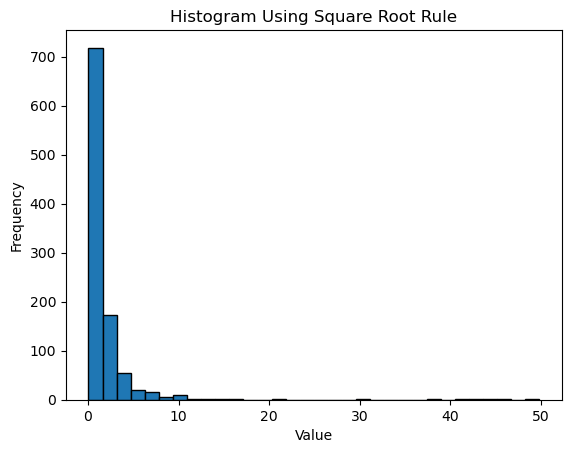

In [7]:
plt.hist(data_with_outliers, bins='sqrt', edgecolor='black')
plt.title("Histogram Using Square Root Rule")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### 5. Discussion

- Sturges' Rule suggested 11 bins for our dataset. This number of bins is too small to capture the skewness and the presence of outliers in the data. The histogram appears too coarse, and important details are lost.

- Freedman-Diaconis Rule suggested 181 bins, which might be too many bins, leading to a very sparse histogram. However, it does a better job at showing the distribution's skewness and highlights the presence of outliers.

- Square Root Rule suggested 32 bins, which provides a balance between the two extremes. The histogram using the Square Root Rule shows the skewness and some of the data's finer details.

The problem with **Sturges' Rule** in this case is that it underestimates the number of bins needed for a skewed dataset with outliers. It assumes data is normally distributed, which is not the case here.m

### 6. Conclusion

Sturges' Rule can be inadequate for datasets that are skewed or contain outliers. It tends to underestimate the number of bins, resulting in histograms that do not reveal important features of the data.

When dealing with such datasets, it's better to use binning methods that consider data variability, like the Freedman-Diaconis Rule or the Square Root Rule.